<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-2-Kaggle-Challenge/blob/master/assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 112kB 23.7MB/s 
     |████████████████████████████████| 133kB 56.9MB/s 
     |████████████████████████████████| 57.7MB 74.1MB/s 
     |████████████████████████████████| 245kB 46.4MB/s 
     |████████████████████████████████| 614kB 55.1MB/s 
     |████████████████████████████████| 225kB 58.7MB/s 
     |████████████████████████████████| 768kB 53.3MB/s 
     |████████████████████████████████| 51kB 24.5MB/s 
     |████████████████████████████████| 194kB 60.8MB/s 
     |████████████████████████████████| 51kB 24.6MB/s 
     |█████████████████████████████

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

In [31]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [0]:
#wrangling
import numpy as np
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
def wrangle_tanzania(X):
  '''wrangle tanzania dataset'''
  X = X.copy()
  cols_with_zeros = ['longitude', 'latitude', 'construction_year']
  for col in cols_with_zeros:                                                             #eliminate "null island"
    X[col] = X.replace(0, np.nan)

  X['latitude'] = X['latitude'].replace(-2e-08, np.nan)                                    #remove latitude values outside tanzania

  X['year_recorded'] = pd.to_datetime(X['date_recorded']).dt.year                          #transform to datetime, isolate year

  X['years_since_construction'] = X['year_recorded'] - X['construction_year']              #new series: years since construction

  X = X.drop(columns='date_recorded').drop(columns='id')

  impute_mean = SimpleImputer(strategy='mean')                                             #imputer with mean
  impute_mode = SimpleImputer(strategy='most_frequent')                                    #imputer with mode

  ##IMPUTING
  
  mask = X.select_dtypes('object').nunique() < 15
  categorical_features = X.select_dtypes('object').columns[mask].tolist()                        #categorical features mask
  X[categorical_features] = impute_mode.fit_transform(X[categorical_features].values)      #fit and transform object columns with mode

  numerical_features = X.select_dtypes('number').columns.tolist()       #numeric features mask
  X[numerical_features] = impute_mean.fit_transform(X[numerical_features].values)          #for other dtypes, fit and transform with mean
  
  ##SEPARATE X AND Y
  features = categorical_features + numerical_features
  target = 'status_group'

  X_set = (X[features]
#            .drop(target, axis= 1)
          )
  X_set = X_set.reset_index(drop=True)
#   y_set = X[target]
#   y_set = y_set.reset_index(drop=True)
  X_set = X_set.values

  return X_set



In [27]:
##TRAIN / VAL SPLIT
from sklearn.model_selection import train_test_split
train, val = train_test_split(train,
                                                  test_size = 0.8, train_size = 0.2,
                                                  random_state = 42,
                                                  shuffle = True,
                                                  stratify = train['status_group']
                             )
train.shape, val.shape

((11880, 41), (47520, 41))

In [37]:
from sklearn.ensemble import RandomForestClassifier
#decision tree

X_train, y_train = wrangle_tanzania(train)
X_val, y_val = wrangle_tanzania(val)
pipeline = make_pipeline(OrdinalEncoder(),
#                          SelectKBest(score_func=f_classif, k=50),
                         RobustScaler(),
                         RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=50))
pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
val_score = pipeline.score(X_val, y_val)

print('Train Score', train_score)
print('Validation Score', val_score)

Train Score 0.8140740740740741
Validation Score 0.8136363636363636


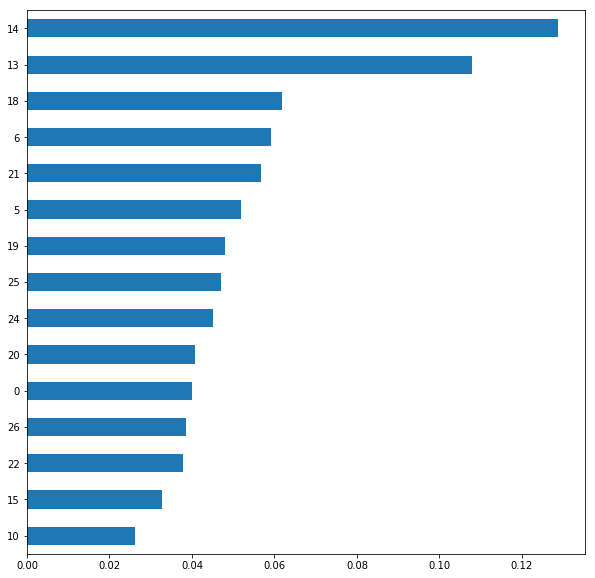

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
importances = pd.Series(rf.feature_importances_,
                        encoded.columns)
n=15
plt.figure(figsize=(10, 10))
importances.sort_values()[-n:].plot.barh()

In [0]:
X_test = wrangle_tanzania(test)
y_pred = pipeline.predict(X_test)

submission = sample_submission.copy()
submission['status_group'] = y_pred

submission.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')